In [33]:
# Importing the libraries 
import numpy # https://numpy.org/

import pandas # https://pandas.pydata.org/
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt  # https://matplotlib.org/
import seaborn as sns # https://seaborn.pydata.org/

from sklearn import model_selection       
from sklearn.metrics import classification_report   
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 


from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import mean_squared_error  
from sklearn.metrics import max_error

from sklearn.model_selection import GridSearchCV

In [2]:
print('Loading data from file ...')  # Loading the data
dataset = pandas.read_csv('BDOShoham.csv') # default is header=infer, change if column names are not in first row
print('done \n')

print('Removing rows with missing data ...')  # Make things simple
dataset = dataset.dropna()  # default is to drop any row that contains at least one missing value
print('done \n')

Loading data from file ...
done 

Removing rows with missing data ...
done 



In [3]:
#Printing data to chek first 10 and last 100 lines
print('Sample rows from the dataset (top ten):')  
print(dataset.head(10))  # first 10 rows

print('Sample rows from the dataset (bottom ten):')  
print(dataset.tail(10))  # last 10 rows

Sample rows from the dataset (top ten):
   FlowPattern  Vsl    Vsg   VisL     VisG  DenL  DenG    ST  Ang     ID
0            1  6.3  0.025  0.001  0.00002  1000   1.8  0.07  0.0  0.051
1            1  4.0  0.040  0.001  0.00002  1000   1.8  0.07  0.0  0.051
2            1  6.3  0.040  0.001  0.00002  1000   1.8  0.07  0.0  0.051
3            1  4.0  0.063  0.001  0.00002  1000   1.8  0.07  0.0  0.051
4            1  6.3  0.063  0.001  0.00002  1000   1.8  0.07  0.0  0.051
5            1  4.0  0.100  0.001  0.00002  1000   1.8  0.07  0.0  0.051
6            1  6.3  0.100  0.001  0.00002  1000   1.8  0.07  0.0  0.051
7            1  4.0  0.160  0.001  0.00002  1000   1.8  0.07  0.0  0.051
8            1  6.3  0.160  0.001  0.00002  1000   1.8  0.07  0.0  0.051
9            1  4.0  0.400  0.001  0.00002  1000   1.8  0.07  0.0  0.051
Sample rows from the dataset (bottom ten):
      FlowPattern      Vsl       Vsg   VisL     VisG  DenL  DenG    ST   Ang  \
5665            5  2.56915   6.272

In [4]:
# A numerical summary table of the above data
print('Summary of the dataset - Univariate statistics')   
print(dataset.describe(include='all'))

Summary of the dataset - Univariate statistics
       FlowPattern          Vsl          Vsg          VisL          VisG  \
count  5675.000000  5675.000000  5675.000000  5.675000e+03  5.675000e+03   
mean      4.059912     0.899747     6.222612  1.000000e-03  2.000000e-05   
std       1.379238     1.425159     8.699644  4.055273e-17  2.361736e-18   
min       1.000000     0.001100     0.003720  1.000000e-03  2.000000e-05   
25%       3.000000     0.016000     0.162055  1.000000e-03  2.000000e-05   
50%       5.000000     0.250000     1.600000  1.000000e-03  2.000000e-05   
75%       5.000000     1.500000    10.000000  1.000000e-03  2.000000e-05   
max       7.000000    25.517000    42.956200  1.000000e-03  2.000000e-05   

         DenL          DenG            ST          Ang           ID  
count  5675.0  5.675000e+03  5.675000e+03  5675.000000  5675.000000  
mean   1000.0  1.800000e+00  7.000000e-02     2.727401     0.038657  
std       0.0  4.108187e-14  5.690394e-15    46.202822    

In [5]:
# Predicting the value of 'FlowPattern' using these three features:  'Vsl', 'Vsg', 'Ang'

print('Reading list of problem variables X and Y...')
X_name = [ 'Vsl', 'Vsg', 'Ang' ] # names of columns to focus on as predictors
X = dataset[X_name]   # only keep these columns as features
y_name = 'FlowPattern'   # name of column to focus on as target
y = dataset[y_name]   # only keep this column as label 
print('done \n')

Reading list of problem variables X and Y...
done 



Summary of X - Univariate graphs


<Figure size 640x480 with 0 Axes>

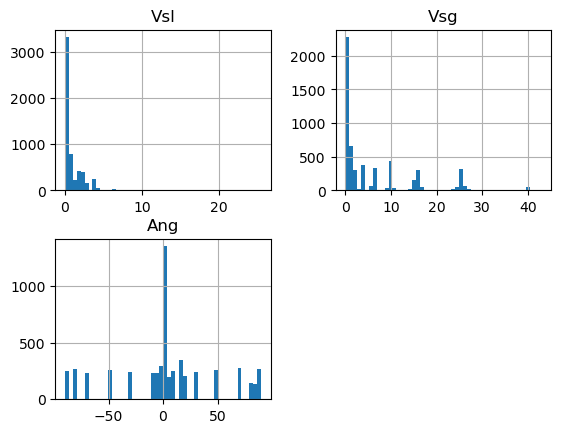

<Figure size 640x480 with 0 Axes>

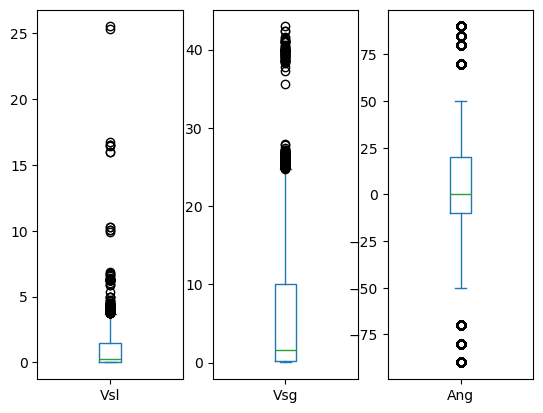

In [9]:
print('Summary of X - Univariate graphs')

plt.figure()  
X.hist(bins=50)  # histogram with number of bins ~= sqrt(N)
plt.show()

plt.figure()
X.plot(kind='box', subplots=True, sharex=False, sharey=False)  # boxplots
plt.show()

Summary of X - Bivariate (column-pair) graphs:


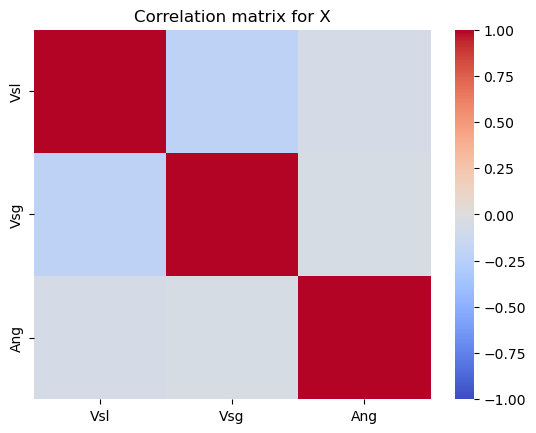

<Figure size 640x480 with 0 Axes>

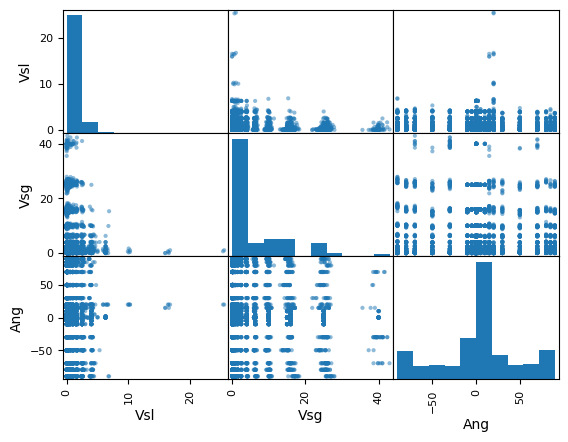

In [11]:
# More graphical summaries
print('Summary of X - Bivariate (column-pair) graphs:')

#Plotting correlation matrix
plt.figure()
corr = X.corr()    # compute the correlation between the variables
sns.heatmap( corr, cmap='coolwarm', vmax=1.0, vmin=-1.0 );   # plot it as a heat map
plt.title('Correlation matrix for X')
plt.show()

plt.figure()
scatter_matrix(X)
plt.show()

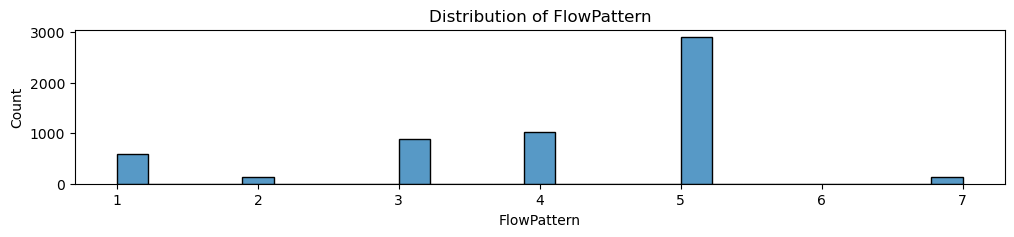

In [12]:
# Plotting the distribution of y
plt.figure(figsize=(12, 2))   # we can control the size of the figure
sns.histplot(data=y)
plt.title('Distribution of FlowPattern')
plt.show()

In [15]:
# Time for ML
model_name = LogisticRegression()   

print('please wait - training model on data...')
model_name.fit(X, y)  # train the model on the data
print('done with training the model')


please wait - training model on data...
done with training the model


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
# How does the model do with predictions? 

# Spot checks

X_spot_check = X.loc[406:415,] # select rows labeled 406 - 415
y_spot_check = y.loc[406:415]  # select rows labeled 406 - 415

print('spot check predictions')

print('features:')
print(X_spot_check)

predicted_label = model_name.predict(X_spot_check)  # make predictions

print('predicted label(s):')
print(predicted_label)
print('true label(s):')
print(y_spot_check)


spot check predictions
features:
      Vsl  Vsg  Ang
406  0.63  4.0  0.5
407  1.00  4.0  0.5
408  2.50  4.0  0.5
409  4.00  4.0  0.5
410  0.25  6.3  0.5
411  0.40  6.3  0.5
412  0.63  6.3  0.5
413  1.00  6.3  0.5
414  2.50  6.3  0.5
415  4.00  6.3  0.5
predicted label(s):
[5 5 5 1 5 5 5 5 5 5]
true label(s):
406    5
407    5
408    5
409    5
410    5
411    5
412    5
413    5
414    5
415    5
Name: FlowPattern, dtype: int64


In [19]:
# Setting up assessment framework

# Splitting data into training and testing datasets
test_pct = 0.40   # reserving a random 40% of the data points for testing performance
seed = 7          # setting the seed means that _the_same_ 40% will be split for testing every time we run this notebook - this allows for repeatability/reproducibility
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_pct, random_state=seed)

RESULTS FOR KNN-uniform
Accuracy:, 0.832

 clasification report:
               precision    recall  f1-score   support

           1       0.78      0.78      0.78       246
           2       0.89      0.87      0.88        63
           3       0.73      0.88      0.80       361
           4       0.78      0.79      0.79       403
           5       0.92      0.84      0.88      1152
           7       0.57      0.71      0.63        45

    accuracy                           0.83      2270
   macro avg       0.78      0.81      0.79      2270
weighted avg       0.84      0.83      0.83      2270



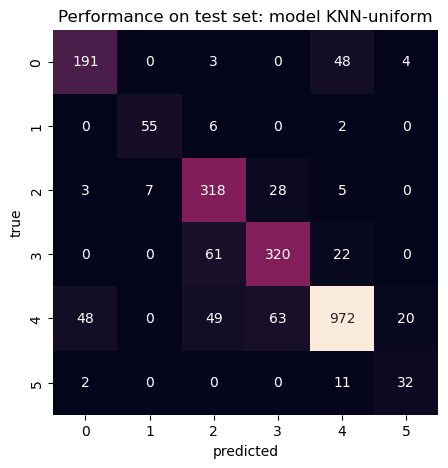

RESULTS FOR KNN-distance
Accuracy:, 0.859

 clasification report:
               precision    recall  f1-score   support

           1       0.81      0.83      0.82       246
           2       0.79      0.89      0.84        63
           3       0.80      0.86      0.83       361
           4       0.81      0.82      0.82       403
           5       0.93      0.88      0.90      1152
           7       0.62      0.78      0.69        45

    accuracy                           0.86      2270
   macro avg       0.79      0.84      0.82      2270
weighted avg       0.86      0.86      0.86      2270



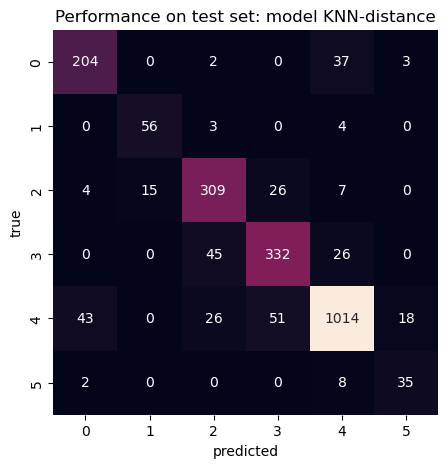

RESULTS FOR LR
Accuracy:, 0.649

 clasification report:
               precision    recall  f1-score   support

           1       0.80      0.53      0.64       246
           2       0.00      0.00      0.00        63
           3       0.33      0.14      0.20       361
           4       0.70      0.65      0.67       403
           5       0.66      0.88      0.75      1152
           7       0.51      0.40      0.45        45

    accuracy                           0.65      2270
   macro avg       0.50      0.43      0.45      2270
weighted avg       0.61      0.65      0.61      2270



/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels

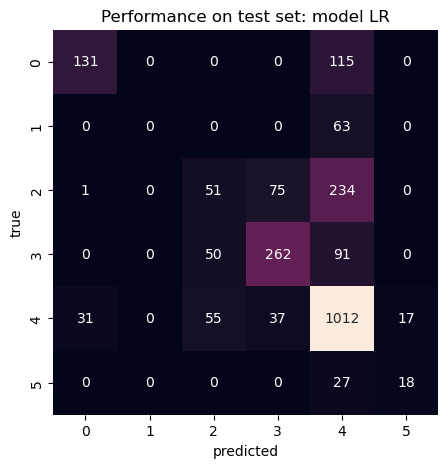

In [41]:
# Training candidate models on the training data and checking their performance on unseen test data.

# First making a list with several models to try out and giving them names
models = []
models.append(('KNN-uniform', KNeighborsClassifier(n_neighbors=5, weights='uniform')))   # Default template model for kNN (KNN-uniform)
models.append(('KNN-distance', KNeighborsClassifier(n_neighbors=3, weights='distance'))) # Another configuration of the default template (KNN-distance)
models.append(('LR', LogisticRegression()))                                              # Default template model for LR (LR) 

for name, modelName in models:   # Select each model in turn
    modelName.fit(X_train, y_train)  # train the model on the training data
    y_predicted = modelName.predict(X_test)  # make predictions using the test data
    # Comparing predictions to ground truth
    print('RESULTS FOR '+name)  
    #print(type(accuracy_score(y_test, y_predicted)))
    print(f'Accuracy:, {accuracy_score(y_test, y_predicted):.3f}')  # compare predictions to ground truth using accuracy as metric 
    print('\n clasification report:\n', classification_report(y_test, y_predicted))  # several metrics reported in table form
    plt.figure(figsize=(5, 5))
    sns.heatmap(confusion_matrix(y_test, y_predicted), square=True, annot=True, fmt='d', cbar=False)
    plt.xlabel('predicted')
    plt.ylabel('true')
    plt.title('Performance on test set: model '+name)
    plt.show()

# Comments on model performance during training
Based on the accuracy, kNN-distance (0.859) performs better than kNN-uniform (0.832) and LR (0.649). The precision, recall, and f1-score also follow similar pattern. So, for the current data and the used model in this assignment, all scoring methods are predicting kNN-distance to perform better than kNN-uniform and LR performs worse than the kNN models.

When comparing different scoring methods (weighted avg) for same model, precision outperforms recall and f1-score for kNN-uniform while all three (precision, recall, and f1-score) predict similar accuracy for kNN-distance. On the other hand, recall outperforms precision and f1-score for LR.  


In [54]:
# Training and validating the models on the formative data set using "f1_micro" scoring method

# Using 10-fold cross validation to estimate the models' capacity to generalize on the reserved test data
# Remember, we do not touch the actual test data yet - we use the training data to validate the model, not test it
k4folds = 10   # This will split our formative dataset into five parts;

scoring_method = 'f1_micro' # Chose the formative scoring method
print(f'Results for %s scoring method' % (scoring_method))

results = []
names = []
for name, model in models:   # Select each model in turn
    print(" ++ NOW WORKING ON ALGORITHM %s ++" % name)
# create the ten folds of the TRAINING data
    print("Splitting data into %s folds" % k4folds)    
    kfold = model_selection.KFold(n_splits=k4folds, random_state=seed, shuffle=True)   
# fit the model using nine parts at a time and then validate it on the oher part that was set aside; and repeat ten times.
    print("Training model and validating it on each fold") 
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring_method) 
    results.append(cv_results)
    names.append(name)
# some fancy footwork for printing the results
    msg = "algorithm %s %s results: mean = %.3f (std = %.3f)" % (name, scoring_method, cv_results.mean(), cv_results.std())
    print(msg)
    print('\n')
    
print('done \n')   # Note that we have not used any of the test data yet!

Results for f1_micro scoring method
 ++ NOW WORKING ON ALGORITHM KNN-uniform ++
Splitting data into 10 folds
Training model and validating it on each fold
algorithm KNN-uniform f1_micro results: mean = 0.824 (std = 0.025)


 ++ NOW WORKING ON ALGORITHM KNN-distance ++
Splitting data into 10 folds
Training model and validating it on each fold
algorithm KNN-distance f1_micro results: mean = 0.850 (std = 0.012)


 ++ NOW WORKING ON ALGORITHM LR ++
Splitting data into 10 folds
Training model and validating it on each fold


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

algorithm LR f1_micro results: mean = 0.663 (std = 0.029)


done 



/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


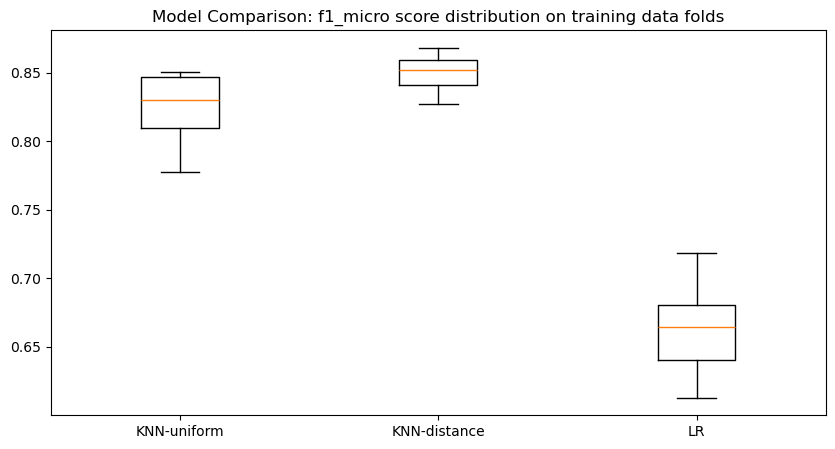

In [55]:
# Graphical comparison 
# We can also create a plot of the model's formative evaluation results 
# and compare the spread and the mean accuracy of each model. 
# There is a population of scoring measures for each model 
# because each model was evaluated several times (k fold cross validation).

fig = plt.figure(figsize=(10, 5)).add_subplot(111) # Create a figure with a single plot inside (1 row, 1 column, 1st plot)
plt.boxplot(results)                               # Draw boxplots for the results of each model
fig.set_xticks(range(1, len(names) + 1))           # Create tickmarks for each model (1-based index for boxplot)
fig.set_xticklabels(names)                         # Place the name of each model at the corresponding tickmark
plt.title('Model Comparison: %s score distribution on training data folds' % scoring_method)
plt.show()

In [56]:
# Training and validating the models on the formative data set using "accuracy" scoring method

# Using 10-fold cross validation to estimate the models' capacity to generalize on the reserved test data
# Remember, we do not touch the actual test data yet - we use the training data to validate the model, not test it
k4folds = 10   # This will split our formative dataset into five parts;

scoring_method = 'accuracy' # Chose the formative scoring method
print(f'Results for %s scoring method' % (scoring_method))

results = []
names = []
for name, model in models:   # Select each model in turn
    print(" ++ NOW WORKING ON ALGORITHM %s ++" % name)
# create the ten folds of the TRAINING data
    print("Splitting data into %s folds" % k4folds)    
    kfold = model_selection.KFold(n_splits=k4folds, random_state=seed, shuffle=True)   
# fit the model using nine parts at a time and then validate it on the other part that was set aside; and repeat ten times.
    print("Training model and validating it on each fold") 
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring_method) 
    results.append(cv_results)
    names.append(name)
# some fancy footwork for printing the results
    msg = "algorithm %s %s results: mean = %.3f (std = %.3f)" % (name, scoring_method, cv_results.mean(), cv_results.std())
    print(msg)
    print('\n')
    
print('done \n')   # Note that we have not used any of the test data yet!

Results for accuracy scoring method
 ++ NOW WORKING ON ALGORITHM KNN-uniform ++
Splitting data into 10 folds
Training model and validating it on each fold
algorithm KNN-uniform accuracy results: mean = 0.824 (std = 0.025)


 ++ NOW WORKING ON ALGORITHM KNN-distance ++
Splitting data into 10 folds
Training model and validating it on each fold
algorithm KNN-distance accuracy results: mean = 0.850 (std = 0.012)


 ++ NOW WORKING ON ALGORITHM LR ++
Splitting data into 10 folds
Training model and validating it on each fold


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

algorithm LR accuracy results: mean = 0.663 (std = 0.029)


done 



/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

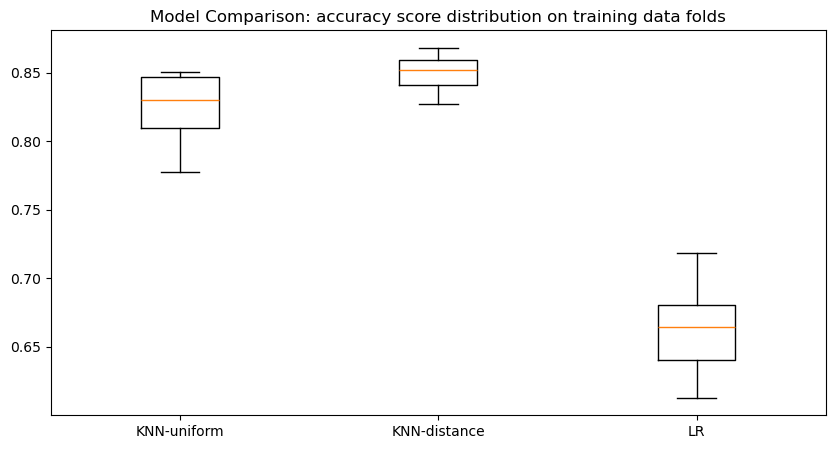

In [57]:
# Graphical comparison 
# We can also create a plot of the model's formative evaluation results 
# and compare the spread and the mean accuracy of each model. 
# There is a population of scoring measures for each model 
# because each model was evaluated several times (k fold cross validation).

fig = plt.figure(figsize=(10, 5)).add_subplot(111) # Create a figure with a single plot inside (1 row, 1 column, 1st plot)
plt.boxplot(results)                               # Draw boxplots for the results of each model
fig.set_xticks(range(1, len(names) + 1))           # Create tickmarks for each model (1-based index for boxplot)
fig.set_xticklabels(names)                         # Place the name of each model at the corresponding tickmark
plt.title('Model Comparison: %s score distribution on training data folds' % scoring_method)
plt.show()

In [58]:
# Training and validating the models on the formative data set using "f1_weighted" scoring method

# Using 10-fold cross validation to estimate the models' capacity to generalize on the reserved test data
# Remember, we do not touch the actual test data yet - we use the training data to validate the model, not test it
k4folds = 10   # This will split our formative dataset into five parts;

scoring_method = 'f1_weighted' # Chose the formative scoring method
print(f'Results for %s scoring method' % (scoring_method))

results = []
names = []
for name, model in models:   # Select each model in turn
    print(" ++ NOW WORKING ON ALGORITHM %s ++" % name)
# create the ten folds of the TRAINING data
    print("Splitting data into %s folds" % k4folds)    
    kfold = model_selection.KFold(n_splits=k4folds, random_state=seed, shuffle=True)   
# fit the model using nine parts at a time and then validate it on the other part that was set aside; and repeat ten times.
    print("Training model and validating it on each fold") 
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring_method) 
    results.append(cv_results)
    names.append(name)
# some fancy footwork for printing the results
    msg = "algorithm %s %s results: mean = %.3f (std = %.3f)" % (name, scoring_method, cv_results.mean(), cv_results.std())
    print(msg)
    print('\n')
    
print('done \n')   # Note that we have not used any of the test data yet!

Results for f1_weighted scoring method
 ++ NOW WORKING ON ALGORITHM KNN-uniform ++
Splitting data into 10 folds
Training model and validating it on each fold
algorithm KNN-uniform f1_weighted results: mean = 0.827 (std = 0.025)


 ++ NOW WORKING ON ALGORITHM KNN-distance ++
Splitting data into 10 folds
Training model and validating it on each fold
algorithm KNN-distance f1_weighted results: mean = 0.851 (std = 0.012)


 ++ NOW WORKING ON ALGORITHM LR ++
Splitting data into 10 folds
Training model and validating it on each fold


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

algorithm LR f1_weighted results: mean = 0.629 (std = 0.035)


done 



/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


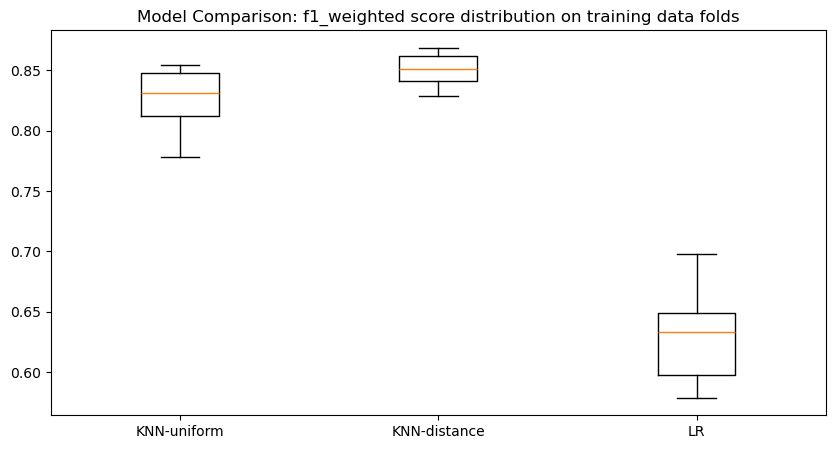

In [59]:
# Graphical comparison 
# We can also create a plot of the model's formative evaluation results 
# and compare the spread and the mean accuracy of each model. 
# There is a population of scoring measures for each model 
# because each model was evaluated several times (k fold cross validation).

fig = plt.figure(figsize=(10, 5)).add_subplot(111) # Create a figure with a single plot inside (1 row, 1 column, 1st plot)
plt.boxplot(results)                               # Draw boxplots for the results of each model
fig.set_xticks(range(1, len(names) + 1))           # Create tickmarks for each model (1-based index for boxplot)
fig.set_xticklabels(names)                         # Place the name of each model at the corresponding tickmark
plt.title('Model Comparison: %s score distribution on training data folds' % scoring_method)
plt.show()

# Comments on model performance after Validation#

Using 10-fold cross-validation and different scoring_methods (accuracy, f1_micro, and f1_weighted), kNN-distance performs better than kNN-uniform and LR.

Different scoring methods lead to slightly different results. For the 10-fold cross-validation used above, the f1_micro and accuracy gave almost similar results, while f1_weighted predicted higher mean+-std for kNN-distance and kNN-uniform.

 ++++ Detailed classification report for the selected model ++++ 
Model is KNeighborsClassifier(weights='distance') 
This model was trained and tuned on the development set using CV.
The following results are computed on the separate test set:

 clasification report:
               precision    recall  f1-score   support

           1       0.79      0.78      0.79       246
           2       0.80      0.90      0.85        63
           3       0.78      0.87      0.82       361
           4       0.81      0.81      0.81       403
           5       0.92      0.87      0.90      1152
           7       0.62      0.82      0.70        45

    accuracy                           0.85      2270
   macro avg       0.79      0.84      0.81      2270
weighted avg       0.86      0.85      0.85      2270



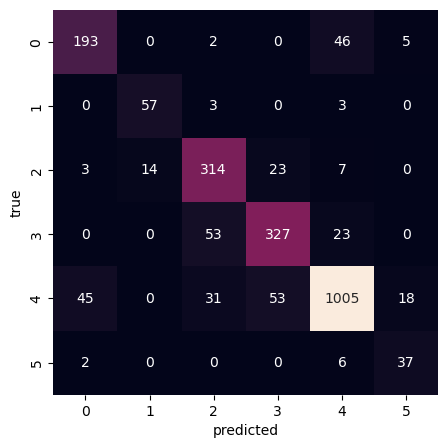

In [64]:
# First we retrain the most capable model (kNN-distance) using ALL of the training data
selected_model = KNeighborsClassifier(weights='distance')
selected_model.fit(X_train, y_train)

# Next we use this retrained model on the test set and summarize the results 
# as a final confusion matrix and a classification report.
y_predicted = selected_model.predict(X_test)

print(" ++++ Detailed classification report for the selected model ++++ " )
print("Model is %s " % selected_model)
print("This model was trained and tuned on the development set using CV.")
print("The following results are computed on the separate test set:")
print('\n clasification report:\n', classification_report(y_test, y_predicted))  # several metrics reported in table form
plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix(y_test, y_predicted), square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('predicted')
plt.ylabel('true')
plt.show()

In [65]:
# Using GridSearchCV to create a whole family of models that are variations of the most capable model (kNN-distance)
hyperparameters = {'n_neighbors':[3, 4, 5, 6, 7, 8, 9], 'weights':['uniform','distance']}     # specify the configurations of the family members
modelFamily = GridSearchCV(KNeighborsClassifier(), hyperparameters, cv=7, scoring=scoring_method)

modelFamily.fit(X_train, y_train)  # train and validate all the family members together

# Select the most promising model version (this is the "tuned" model)
print("Best hyperparameters set found on development (formative) data set:")
print(modelFamily.best_params_)

# Report results for all model variations in the family, to make sure the tuning worked
print("Grid scores on development (formative) data set:")
means = modelFamily.cv_results_['mean_test_score']
stds = modelFamily.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, modelFamily.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
        % (mean, std * 2, params))
print('\n')

Best hyperparameters set found on development (formative) data set:
{'n_neighbors': 3, 'weights': 'distance'}
Grid scores on development (formative) data set:
0.842 (+/-0.042) for {'n_neighbors': 3, 'weights': 'uniform'}
0.852 (+/-0.035) for {'n_neighbors': 3, 'weights': 'distance'}
0.822 (+/-0.033) for {'n_neighbors': 4, 'weights': 'uniform'}
0.851 (+/-0.032) for {'n_neighbors': 4, 'weights': 'distance'}
0.836 (+/-0.034) for {'n_neighbors': 5, 'weights': 'uniform'}
0.851 (+/-0.037) for {'n_neighbors': 5, 'weights': 'distance'}
0.814 (+/-0.039) for {'n_neighbors': 6, 'weights': 'uniform'}
0.850 (+/-0.036) for {'n_neighbors': 6, 'weights': 'distance'}
0.814 (+/-0.027) for {'n_neighbors': 7, 'weights': 'uniform'}
0.847 (+/-0.036) for {'n_neighbors': 7, 'weights': 'distance'}
0.801 (+/-0.031) for {'n_neighbors': 8, 'weights': 'uniform'}
0.846 (+/-0.032) for {'n_neighbors': 8, 'weights': 'distance'}
0.802 (+/-0.024) for {'n_neighbors': 9, 'weights': 'uniform'}
0.838 (+/-0.031) for {'n_neig

Detailed classification report:
Model is KNeighborsClassifier(n_neighbors=3, weights='distance') 
The model was trained and tuned using cross-validation on the full development (formative) data set.
{'n_neighbors': 3, 'weights': 'distance'}
The reported summative evaluation scores were computed on a separate test data set.


              precision    recall  f1-score   support

           1       0.81      0.83      0.82       246
           2       0.79      0.89      0.84        63
           3       0.80      0.86      0.83       361
           4       0.81      0.82      0.82       403
           5       0.93      0.88      0.90      1152
           7       0.62      0.78      0.69        45

    accuracy                           0.86      2270
   macro avg       0.79      0.84      0.82      2270
weighted avg       0.86      0.86      0.86      2270

done 



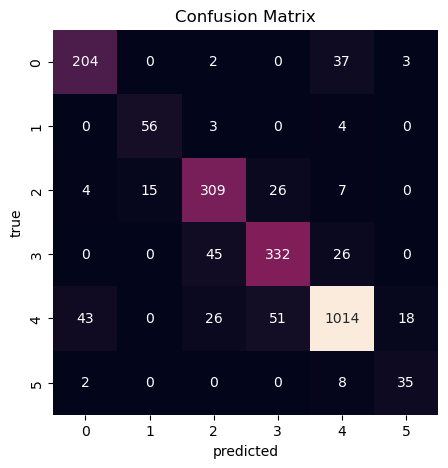

In [66]:
# Reporting the independent final results for the best (i.e., tuned) family member when tested on the separate summative data set
tuned_model = modelFamily.best_estimator_
print("Detailed classification report:")
print("Model is %s " % tuned_model)
print("The model was trained and tuned using cross-validation on the full development (formative) data set.")
print(modelFamily.best_params_)
print("The reported summative evaluation scores were computed on a separate test data set.")
print('\n')
y_pred = tuned_model.predict(X_test)
print(classification_report(y_test, y_pred))
print('done \n')

plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('predicted')
plt.ylabel('true')
plt.title('Confusion Matrix')
plt.show()

# Comments on performance measured on test dataset and training dataset using kNN-distance

Accuracy for test dataset: 0.86
Accuracy for training dataset: 0.85

From above results, it seems that the current model had higher accuracy for test dataset i.e., the model predicted betteron test dataset than on which it was trained.